<a href="https://colab.research.google.com/github/SerbC/SIVA2024/blob/main/Laborator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sklearn
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import glob

In [ ]:
base_path = '/content/drive/MyDrive/Images/'
file_array = []
for i in range(4):
  file_array.append(glob.glob(base_path + str(i) + '/*.jpg'))

print(file_array)

[['/content/drive/MyDrive/Images/0/1.jpg', '/content/drive/MyDrive/Images/0/6.jpg', '/content/drive/MyDrive/Images/0/5.jpg', '/content/drive/MyDrive/Images/0/2.jpg', '/content/drive/MyDrive/Images/0/3.jpg', '/content/drive/MyDrive/Images/0/4.jpg', '/content/drive/MyDrive/Images/0/7.jpg', '/content/drive/MyDrive/Images/0/8.jpg', '/content/drive/MyDrive/Images/0/0.jpg', '/content/drive/MyDrive/Images/0/9.jpg'], ['/content/drive/MyDrive/Images/1/2.jpg', '/content/drive/MyDrive/Images/1/9.jpg', '/content/drive/MyDrive/Images/1/3.jpg', '/content/drive/MyDrive/Images/1/0.jpg', '/content/drive/MyDrive/Images/1/8.jpg', '/content/drive/MyDrive/Images/1/6.jpg', '/content/drive/MyDrive/Images/1/4.jpg', '/content/drive/MyDrive/Images/1/5.jpg', '/content/drive/MyDrive/Images/1/1.jpg', '/content/drive/MyDrive/Images/1/7.jpg'], ['/content/drive/MyDrive/Images/2/0.jpg', '/content/drive/MyDrive/Images/2/9.jpg', '/content/drive/MyDrive/Images/2/8.jpg', '/content/drive/MyDrive/Images/2/7.jpg', '/content/

In [ ]:
random.seed(42)
image_index_array = random.sample(range(0,9), 7)
print(image_index_array)

[1, 0, 5, 2, 8, 4, 7]


In [ ]:
tr_images = []
test_images = []

for j in file_array:
  t_train = []
  t_test = []
  for i in range(10):
    if i in image_index_array:
      t_train.append(j[i])
    else:
      t_test.append(j[i])
  tr_images.append(t_train)
  test_images.append(t_test)

print(np.shape(tr_images))

(4, 7)


(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7ec317ecce50>)

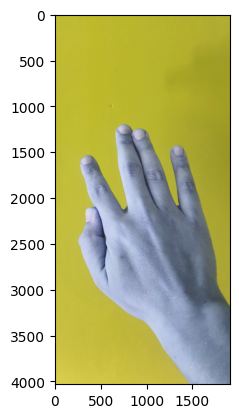

In [ ]:
train = []
test = []

for i in range(7):
  t = []
  for j in tr_images:
    t.append(cv2.imread(j[i]))
  train.append(t)

for i in range(3):
  t = []
  for j in test_images:
    t.append(cv2.imread(j[i]))
  test.append(t)

plt.figure(), plt.imshow(train[0])


(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7ec317dcb820>)

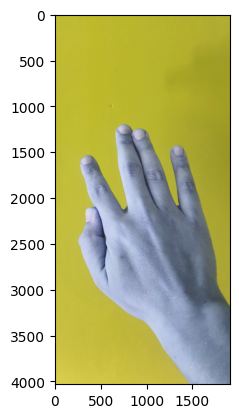

In [ ]:
plt.figure(), plt.imshow(train[0][0])

In [ ]:
print(np.shape(train[0][0]))

(4032, 1908, 3)


(640, 480, 3)


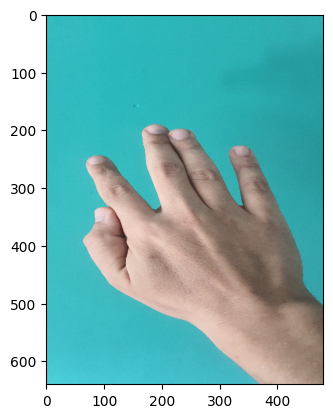

In [ ]:
im = train[0][0]
im_rgb = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im_res = cv2.resize(im_rgb,(480,640))

plt.imshow(im_res)
print(np.shape(im_res))

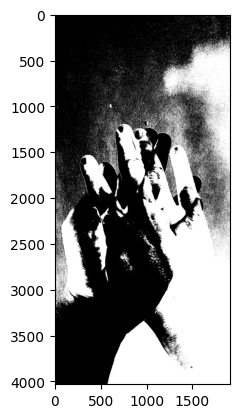

In [ ]:
im_t = train[0][0][:,:,1]-train[0][1][:,:,1]
im_t[im_t < 125 ]= 0
im_t[im_t != 0 ] = 255
plt.imshow(im_t, cmap="gray")